<a href="https://colab.research.google.com/github/Shahilasulthana/TensorFlow/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 1: Generate synthetic binary classification data
np.random.seed(0)
n_samples = 200
X = np.random.uniform(0, 10, size=(n_samples,)).astype(np.float32)  # minutes on pricing page
print(X)

[5.488135   7.1518936  6.0276337  5.448832   4.236548   6.458941
 4.375872   8.91773    9.636627   3.8344152  7.91725    5.288949
 5.6804457  9.255966   0.7103606  0.871293   0.20218398 8.326199
 7.7815676  8.700122   9.786183   7.9915857  4.614794   7.8052917
 1.1827443  6.39921    1.4335328  9.44669    5.2184834  4.1466193
 2.6455562  7.7423368  4.5615034  5.6843395  0.18789801 6.176355
 6.1209574  6.16934    9.437481   6.818203   3.595079   4.3703194
 6.976312   0.6022547  6.6676674  6.7063785  2.1038256  1.289263
 3.1542835  3.6371076  5.7019677  4.386015   9.8837385  1.0204481
 2.0887675  1.6130952  6.531083   2.532916   4.663108   2.4442558
 1.5896958  1.1037514  6.563296   1.3818295  1.9658237  3.6872518
 8.209932   0.9710128  8.379449   0.96098405 9.764595   4.686512
 9.767611   6.048455   7.392636   0.39187792 2.8280697  1.2019656
 2.961402   1.1872772  3.1798317  4.14263    0.64147496 6.9247212
 5.6660147  2.653895   5.2324805  0.9394051  5.7594647  9.292962
 3.1856894  6.674

In [11]:
# Generate labels: more time → more likely to subscribe
y = (X + np.random.normal(0, 1, size=X.shape)) >= 5.5
y = y.astype(np.float32)  # labels: 1 if user subscribed, 0 otherwise
print(y)

[0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0.]


In [12]:
X_tensor = tf.constant(X.reshape(-1, 1), dtype=tf.float32)
y_tensor = tf.constant(y.reshape(-1, 1), dtype=tf.float32)

In [13]:
# Step 2: Initialize weight and bias
W = tf.Variable(tf.random.normal([1, 1]))
b = tf.Variable(tf.random.normal([1]))

In [14]:
# Step 3: Define hyperparameters
learning_rate = 0.01
epochs = 1000
loss_history = []


In [15]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        logits = tf.matmul(X_tensor, W) + b  # Linear part
        y_pred = tf.sigmoid(logits)          # Apply sigmoid to get probabilities
        loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true=y_tensor, y_pred=y_pred))

    loss_history.append(loss.numpy())

    # Compute gradients and apply gradient descent
    gradients = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.numpy():.4f}")

Epoch 100, Loss: 0.7564
Epoch 200, Loss: 0.7124
Epoch 300, Loss: 0.6731
Epoch 400, Loss: 0.6379
Epoch 500, Loss: 0.6065
Epoch 600, Loss: 0.5786
Epoch 700, Loss: 0.5536
Epoch 800, Loss: 0.5312
Epoch 900, Loss: 0.5111
Epoch 1000, Loss: 0.4931


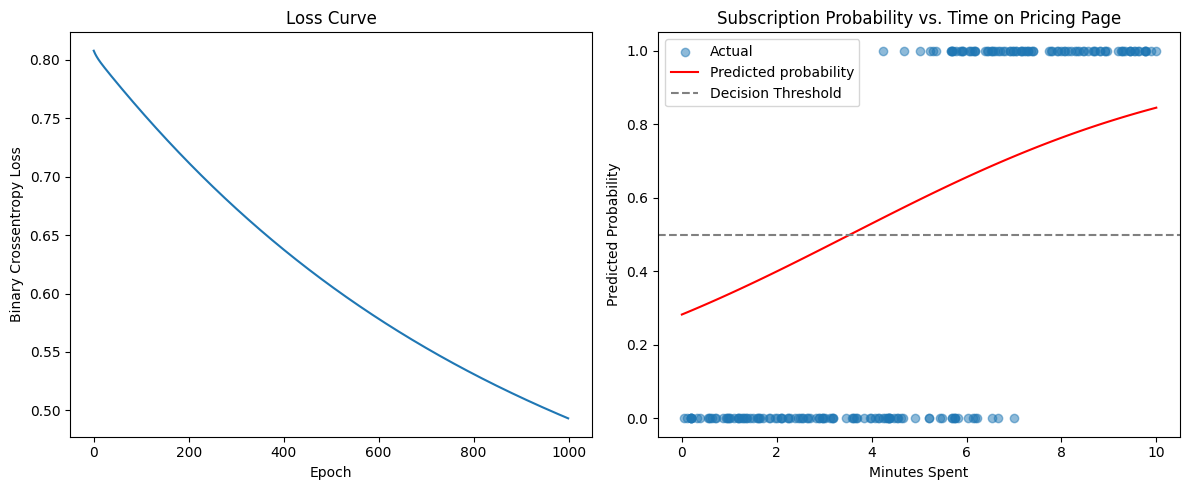

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy Loss")

# Step 6: Visualize decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X, y, label='Actual', alpha=0.5)
X_test = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float32)
X_test_tensor = tf.constant(X_test)
pred_probs = tf.sigmoid(tf.matmul(X_test_tensor, W) + b).numpy()
plt.plot(X_test, pred_probs, color='red', label='Predicted probability')
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold')
plt.title("Subscription Probability vs. Time on Pricing Page")
plt.xlabel("Minutes Spent")
plt.ylabel("Predicted Probability")
plt.legend()
plt.tight_layout()
plt.show()